# Tarea Derivada

Los siguientes datos, son datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa kinovea. Dados los datos en formato csv, se pide  construir un programa que realice lo siguiente: 

1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

3. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?


3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la trasnformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentra el valor máximo empleando metodos de diferenciación.

In [1]:
#librerias
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
init_printing() 

### 1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:                          col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]


In [2]:
# Crear  el dataframe.
route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"
df = pd.read_csv(route, ";") 
df

,Tiempo (ms),"Ángulo 1,"
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [3]:
# Renombre las columnas.
df = df.rename(columns = {"Tiempo (ms)":"Tiempo[ms]", "Ángulo 1,":"AnguloDeg"}) 
df

,Tiempo[ms],AnguloDeg
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [4]:
# Cambair las "," y Crear la columna con el angulo en radianes.
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",", ".").astype("float64") # Remplaza las "," por ".".
df["AnguloRad"] = df["AnguloDeg"].apply(lambda x: np.deg2rad(x) - np.pi/2 ) # Crea la columna "AnguloRad".
df

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.289612,-0.535997
1,42,59.982327,-0.523907
2,75,61.237453,-0.502001
3,108,63.492477,-0.462644
4,142,65.388771,-0.429547
...,...,...,...
2842,94709,94.937576,0.086177
2843,94743,96.479851,0.113095
2844,94776,97.940689,0.138591
2845,94809,99.318092,0.162631


### 2. Construya una grafica de : plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

#### ¿Qué puede concluir respecto al movimiento del pendulo?


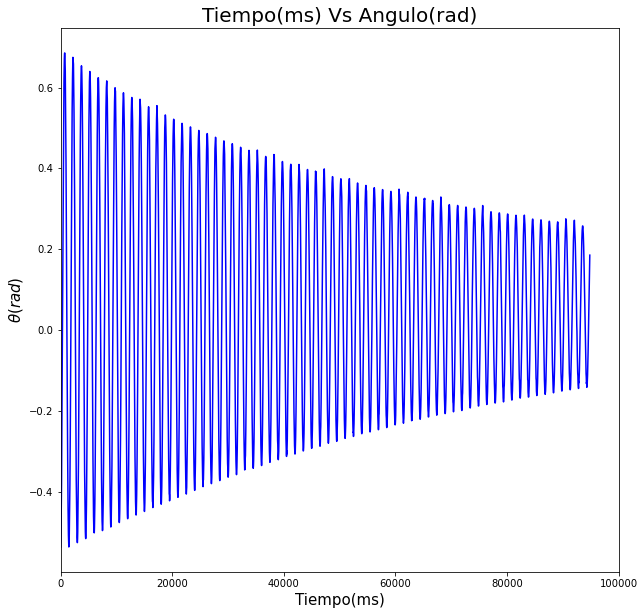

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(df["Tiempo[ms]"], df["AnguloRad"], "b-")
plt.title("Tiempo(ms) Vs Angulo(rad)", fontsize=20)
plt.xlabel("Tiempo(ms)", fontsize=15)
plt.ylabel(r"$\theta (rad)$", fontsize=15)
plt.xlim(0, 100000)
plt.show()

##### Conclusión:
Por el comportamiento que tiene la grafica, se puede apreciar que mediante el tiempo va aumentado el ángulo de recorrido va disminuyendo, esto nos indica el péndulo utilizado en este experimento presenta un movimiento oscilatorio amortiguado.

# 3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la trasnformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentra el valor máximo empleando metodos de diferenciación.

##### - Importe la librerias de scipy fft, fftfreq.

In [6]:
from scipy.fft import fft, fftfreq

##### - Aplique la trasnformada de fourier como sigue:

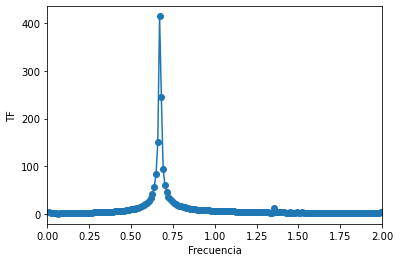

In [7]:
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.figure()
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)
plt.show()

##### - Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

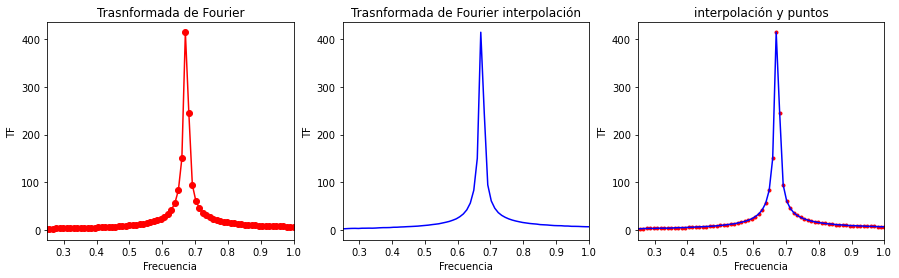

In [8]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"ro-")
plt.xlim(0.25, 1)
plt.title("Trasnformada de Fourier")
plt.xlabel("Frecuencia")
plt.ylabel("TF")
plt.subplot(132)
plt.plot(abs(xf[1:N//2]), cs(xf[1:N//2]),"b" ) 
plt.xlim(0.25, 1)
plt.title("Trasnformada de Fourier interpolación")
plt.xlabel("Frecuencia")
plt.ylabel("TF")
plt.subplot(133)
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.")
plt.plot(abs(xf[1:N//2]), cs(xf[1:N//2]),"b" ) 
plt.xlim(0.25, 1)
plt.title("interpolación y puntos")
plt.xlabel("Frecuencia")
plt.ylabel("TF")
plt.show()

##### -Encuentra el valor máximo empleando metodos de diferenciación.

In [9]:
roots_cs = cs.derivative().roots() # Encuentra las raices de la derivada.

def filter(x,k1,k2): # Encuntra en roots_cs la derivda que cumpla  k1 < dx < k2.
    k = "No hay raiz entre esos valores."
    for i in x:
        if k1 < i and i < k2:
            k = i
    return k            
       
x = filter(roots_cs, 0.65, 0.69) # root en el intervalo deseado.
cs_max = cs(x) # Evaluar la root encontrada para obtener el max.
print(f"El valor máximo es: {cs_max:.8}")

El valor máximo es: 417.86792
